## <a id='1'></a><center> <h3 style="background-color:#e8d8ff; color:#3a0066; padding:15px; border-radius:10px; text-align:center;">🧠 Parkinson’s Disease Prediction</h3>

## 🧠 **`Project Overview`**

- Parkinson’s Disease is a progressive neurological disorder that affects movement. One of the early signs includes changes in voice and speech. 
- In this project, we aim to **`predict whether a patient has Parkinson’s`** based on various **`voice measurements`**.
- The dataset is taken from the **`UCI Machine Learning Repository`**, and we’ll build a machine learning model to make accurate predictions.


<center>
  <img src="A_highly_detailed_medical_illustration_of_Parkinso.png" alt="Parkinson's Disease Prediction" width="600">
</center>

## <a id='1'></a><center> <h3 style="background-color:#e8d8ff; color:#3a0066; padding:10px; border-radius:10px; text-align:center; font-size:25px;">***Import Libraries***</h3>

- Before starting, I will install and import the necessary libraries. These will be used for data processing, visualization, and model building.

In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


## <a id='1'></a><center> <h3 style="background-color:#e8d8ff; color:#3a0066; padding:10px; border-radius:10px; text-align:center; font-size:25px;">📂 ***Load Dataset***</h3>

### 🧾 **`Dataset Overview`**
- To understand the structure and scale of the dataset, we check column types, missing values, and overall statistics.

# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Data Loading and Displaying First Few Rows:***</span>

In [10]:
Dataset = pd.read_csv("parkinsons.data")

In [11]:
Dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## <a id='1'></a><center> <h3 style="background-color:#e8d8ff; color:#3a0066; padding:10px; border-radius:10px; text-align:center; font-size:25px;">📈 ***Exploratory Data Analysis (EDA)***</h3>

# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Basic information about dataset:***</span>

### <u>**`Display shape of the dataset:`**</u>

In [15]:
print("Shape of dataset :", Dataset.shape )

Shape of dataset : (195, 24)


### 📊 **`Dataset Information`**
- **We have 195 data observations.**
- **There are 24 features, including the target.**
- **Features/Attributes:**
  - <u>**`name:`**</u> ASCII subject name and recording number.
  - <u>**`MDVP:Fo(Hz):`**</u> Average vocal fundamental frequency.
  - <u>**`MDVP:Fhi(Hz):`**</u> Maximum vocal fundamental frequency.
  - <u>**`MDVP:Flo(Hz):`**</u> Minimum vocal fundamental frequency.
  - <u>**`MDVP:Jitter(%)`, `MDVP:Jitter(Abs)`, `MDVP:RAP`, `MDVP:PPQ`, `Jitter:DDP`:**</u> Several measures of variation in fundamental frequency.
  - <u>**`MDVP:Shimmer`, `MDVP:Shimmer(dB)`, `Shimmer:APQ3`, `Shimmer:APQ5`, `MDVP:APQ`, `Shimmer:DDA`:**</u> Several measures of variation in amplitude.
  - <u>**`NHR`, `HNR`:**</u> Measures of ratio of noise to tonal components in the voice.
  - <u>**`status`:**</u> Health status of the subject (1 = Parkinson's, 0 = healthy).
  - <u>**`RPDE`, `D2`:**</u> Two nonlinear dynamical complexity measures.
  - <u>**`DFA`:**</u> Signal fractal scaling exponent.
  - <u>**`spread1`, `spread2`, `PPE`:**</u> Three nonlinear measures of fundamental frequency variation.

**We observe that the features are in various ranges. Therefore, we will apply feature scaling—possibly using <code>StandardScaler</code> or <code>MinMaxScaler</code>.**


### <u>**`Dataset Structure:`**</u>

In [18]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

- name is only categorical data, also we will drop this attribute as it is of no use while training the model.
- Rest all are non-categorical.

### <u>**`Check for missing values:`**</u>

In [21]:
display(Dataset.isna().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

- No missing values were found in the dataset.
- All columns are complete and ready for further processing.

### <u>**`Count duplicate rows:`**</u>

In [24]:
print("Duplicate rows before removal: ", Dataset.duplicated().sum())

Duplicate rows before removal:  0


- No duplicate values were found in the dataset, so we can proceed with further analysis.

# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Statistical Summary:***</span>

In [27]:
Dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Target Variable Distribution:***</span>

### <u>**`Count of target variable (0 = No Disease, 1 = Parkinson’s Disease):`**</u>

In [30]:
Dataset.status.value_counts()

1    147
0     48
Name: status, dtype: int64

- This seems to be imbalanced data, as we have only 48 patients records with Healthy or non-Parkison's disease, and 147 data points are with Parkison's disease.
- So lets get the mean values for features w. r. t. the trget(status).

In [32]:
Dataset.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


- From here I could say that healthy person has high frequency(Hz) in almost of the attributes, and person with low frequency is tend to have parkison's disease.
- Just refer to the difference betweem each feature.

## <a id='1'></a><center> <h3 style="background-color:#e8d8ff; color:#3a0066; padding:10px; border-radius:10px; text-align:center; font-size:25px;">📊 ***Data Visualization***</h3>

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***Target Variable Distribution :***</span>

- From the chart, we can see that there are fewer healthy individuals (status = 0) and more individuals with Parkinson’s (status = 1) in the dataset.

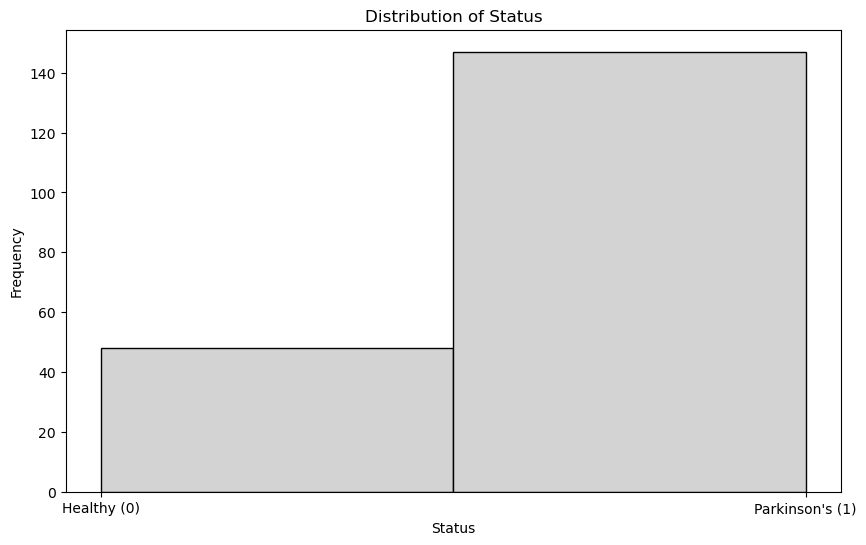

In [37]:
plt.figure(figsize=(10,6))
Dataset['status'].hist(grid=False, bins=2, color='lightgray', edgecolor='black')

plt.xlabel('Status')
plt.ylabel('Frequency')

plt.title('Distribution of Status')

plt.xticks([0, 1], ['Healthy (0)', 'Parkinson\'s (1)'])
plt.show()

- The dataset contains more Parkinson’s patients (status = 1) than healthy individuals (status = 0), indicating an imbalance. This should be considered when training machine learning models.

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***Bar Plot: Status vs NHR :***</span>

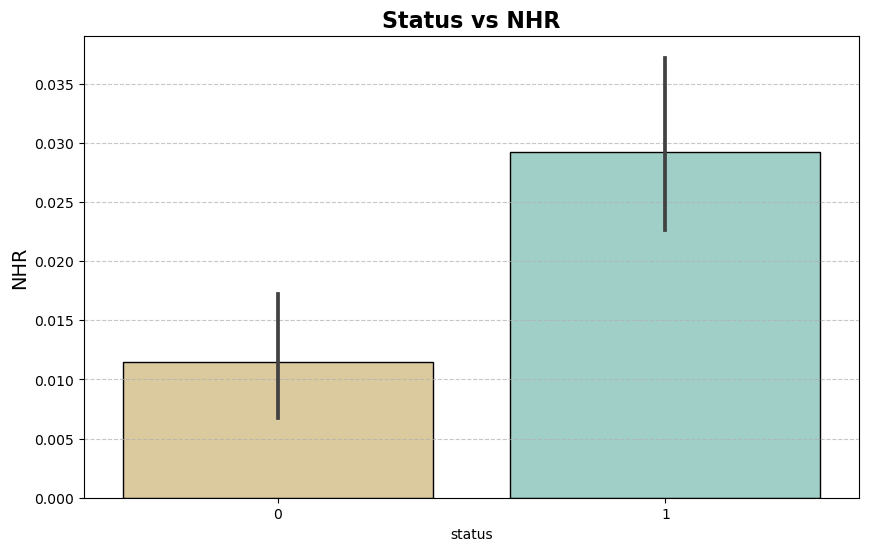

In [40]:
plt.figure(figsize = (10, 6))
sns.barplot(data = Dataset, x = "status", y = "NHR", palette = "BrBG", edgecolor = "black")
plt.title("Status vs NHR", fontsize = 16, fontweight = "bold")
plt.ylabel("Status", fontsize = 14)
plt.ylabel("NHR", fontsize = 14)
plt.grid(axis = "y", linestyle = '--', alpha = 0.7)
plt.show()

- Higher NHR values in Parkinson’s patients indicate increased voice disturbances, making it a useful feature for diagnosis.

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***Bar Plot: Status vs HNR :***</span>

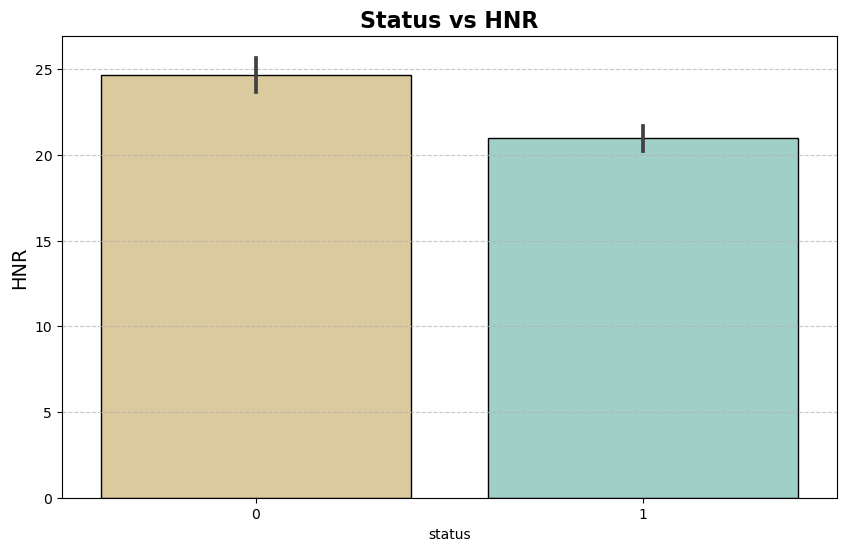

In [43]:
plt.figure(figsize = (10, 6))
sns.barplot(data = Dataset, x = "status", y = "HNR", palette = "BrBG", edgecolor = "black")
plt.title("Status vs HNR", fontsize = 16, fontweight = "bold")
plt.ylabel("Status", fontsize = 14)
plt.ylabel("HNR", fontsize = 14)
plt.grid(axis = "y", linestyle = '--', alpha = 0.7)
plt.show()

- People with Parkinson’s disease tend to have lower HNR values, indicating reduced harmonic components in their voice, which may help in diagnosis.

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***Bar Plot: Status vs RPDE :***</span>

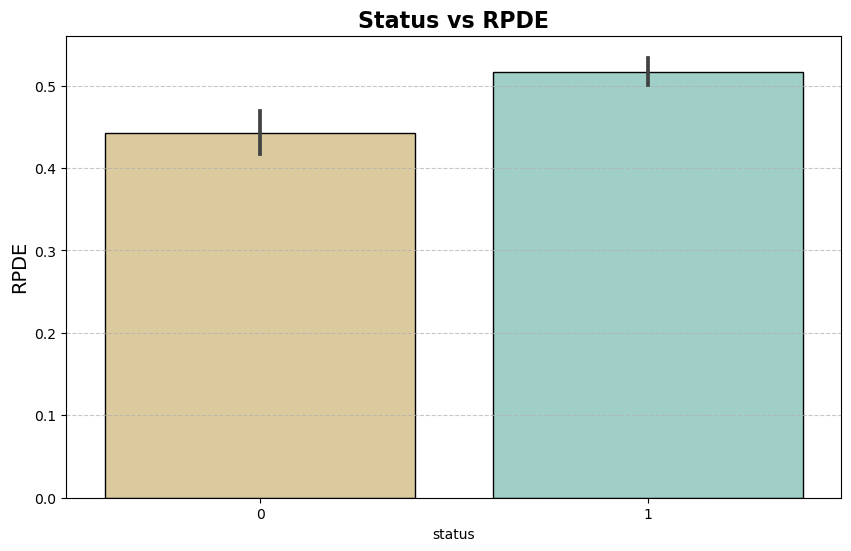

In [46]:
plt.figure(figsize = (10, 6))
sns.barplot(data = Dataset, x = "status", y = "RPDE", palette = "BrBG", edgecolor = "black")
plt.title("Status vs RPDE", fontsize = 16, fontweight = "bold")
plt.ylabel("Status", fontsize = 14)
plt.ylabel("RPDE", fontsize = 14)
plt.grid(axis = "y", linestyle = '--', alpha = 0.7)
plt.show()

- Patients with Parkinson’s disease tend to have higher RPDE values, indicating increased randomness in their speech patterns, which may help in detecting the disease.

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***Correlation Heatmap :***</span>

### <u>**`Drop 'name' column (Not useful for ML models):`**</u>

In [50]:
Dataset.drop(['name'], axis = 1, inplace = True)

### <u>**`Compute correlation matrix:`**</u>

In [52]:
Corr = Dataset.corr()

### <u>**`Display Heatmap:`**</u>

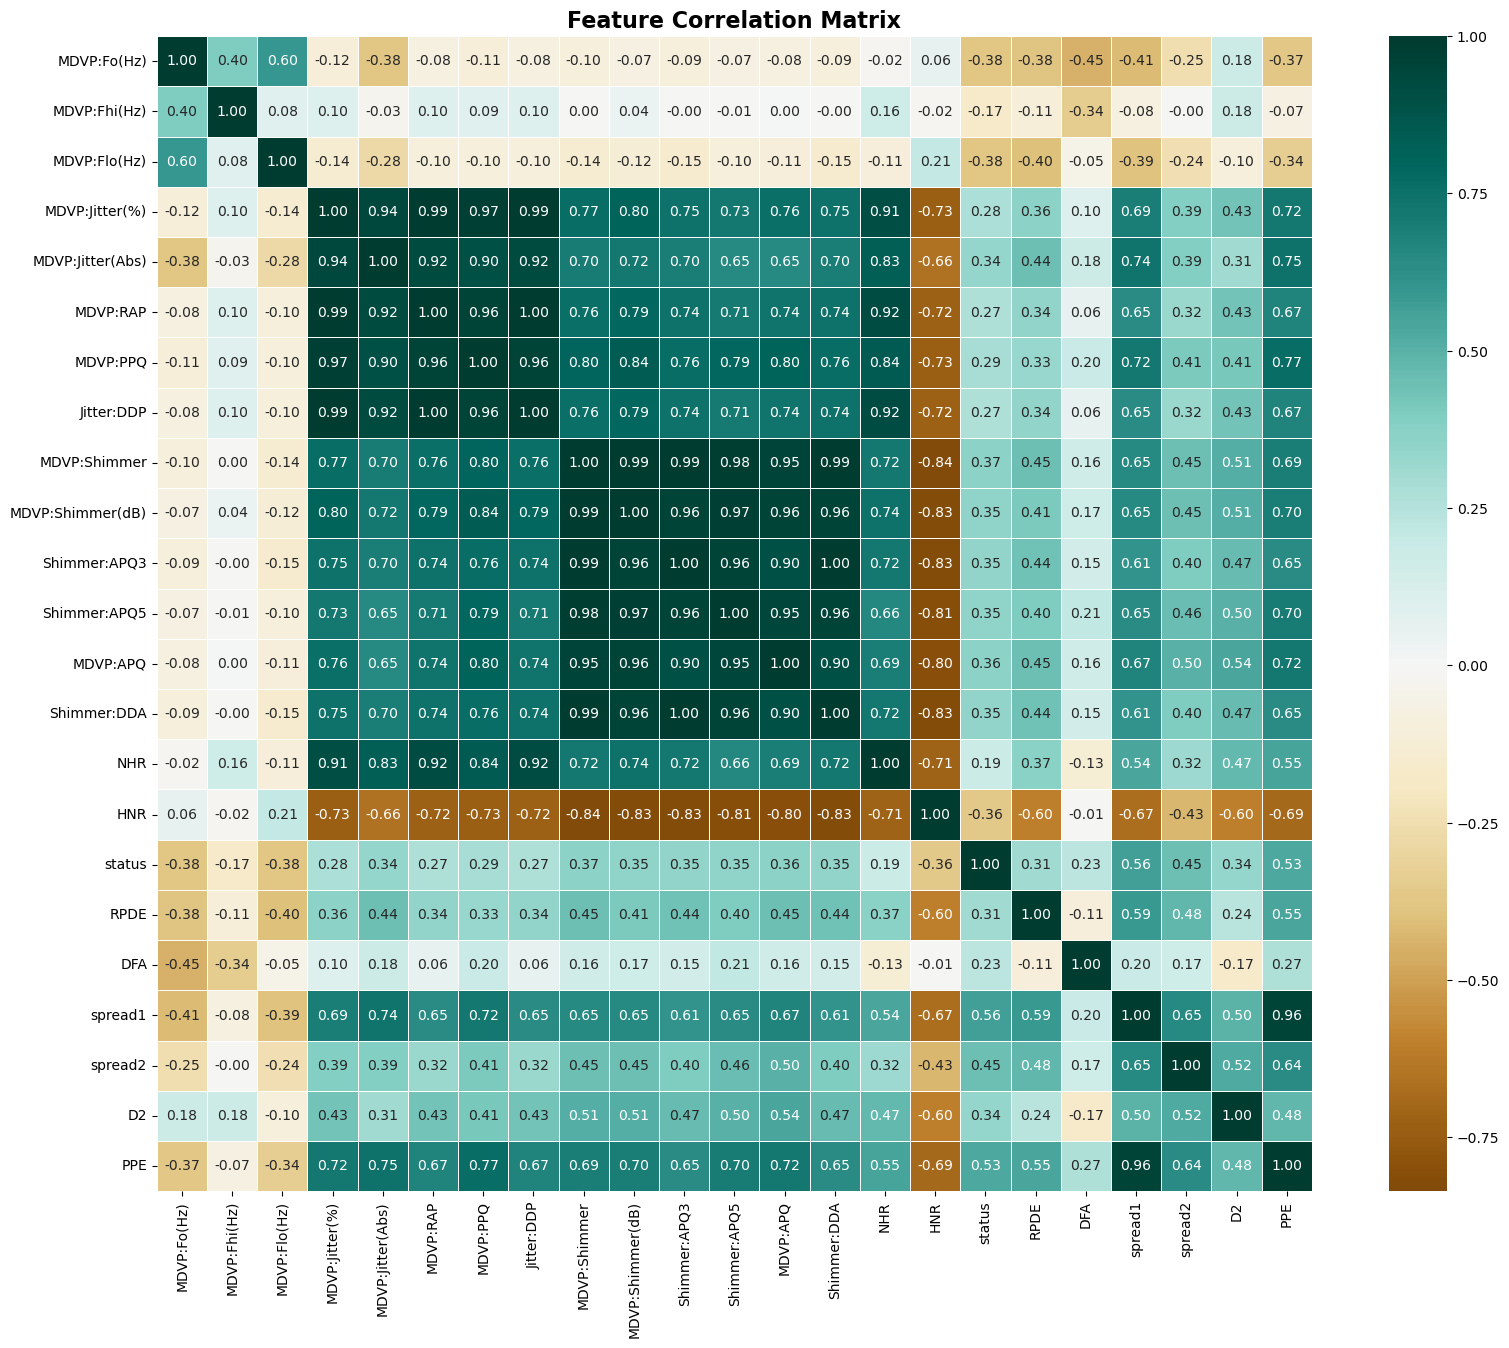

In [54]:
plt.figure(figsize = (20, 15))
sns.heatmap(Dataset.corr(), annot = True, cmap = "BrBG", center = 0, 
            linewidths = 0.5, fmt = ".2f", square = True, annot_kws = {"size":10})
plt.title("Feature Correlation Matrix", fontsize = 16, fontweight = "bold")
plt.show()

**`Conclusion from the Heatmap`**

 - Many features are highly correlated, meaning some provide similar information.
 
 - Features like `MDVP:Fo(Hz)`, `MDVP:Jitter(%)`, `spread1`, and `PPE` show notable correlation with `status`.

 - HNR (Harmonics-to-Noise Ratio) is negatively correlated with jitter and shimmer features, indicating that increased voice instability lowers voice quality.

 - Some features show a good correlation with the status (Parkinson's disease presence), making them useful for prediction.

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***Pairplot with selected features:***</span>

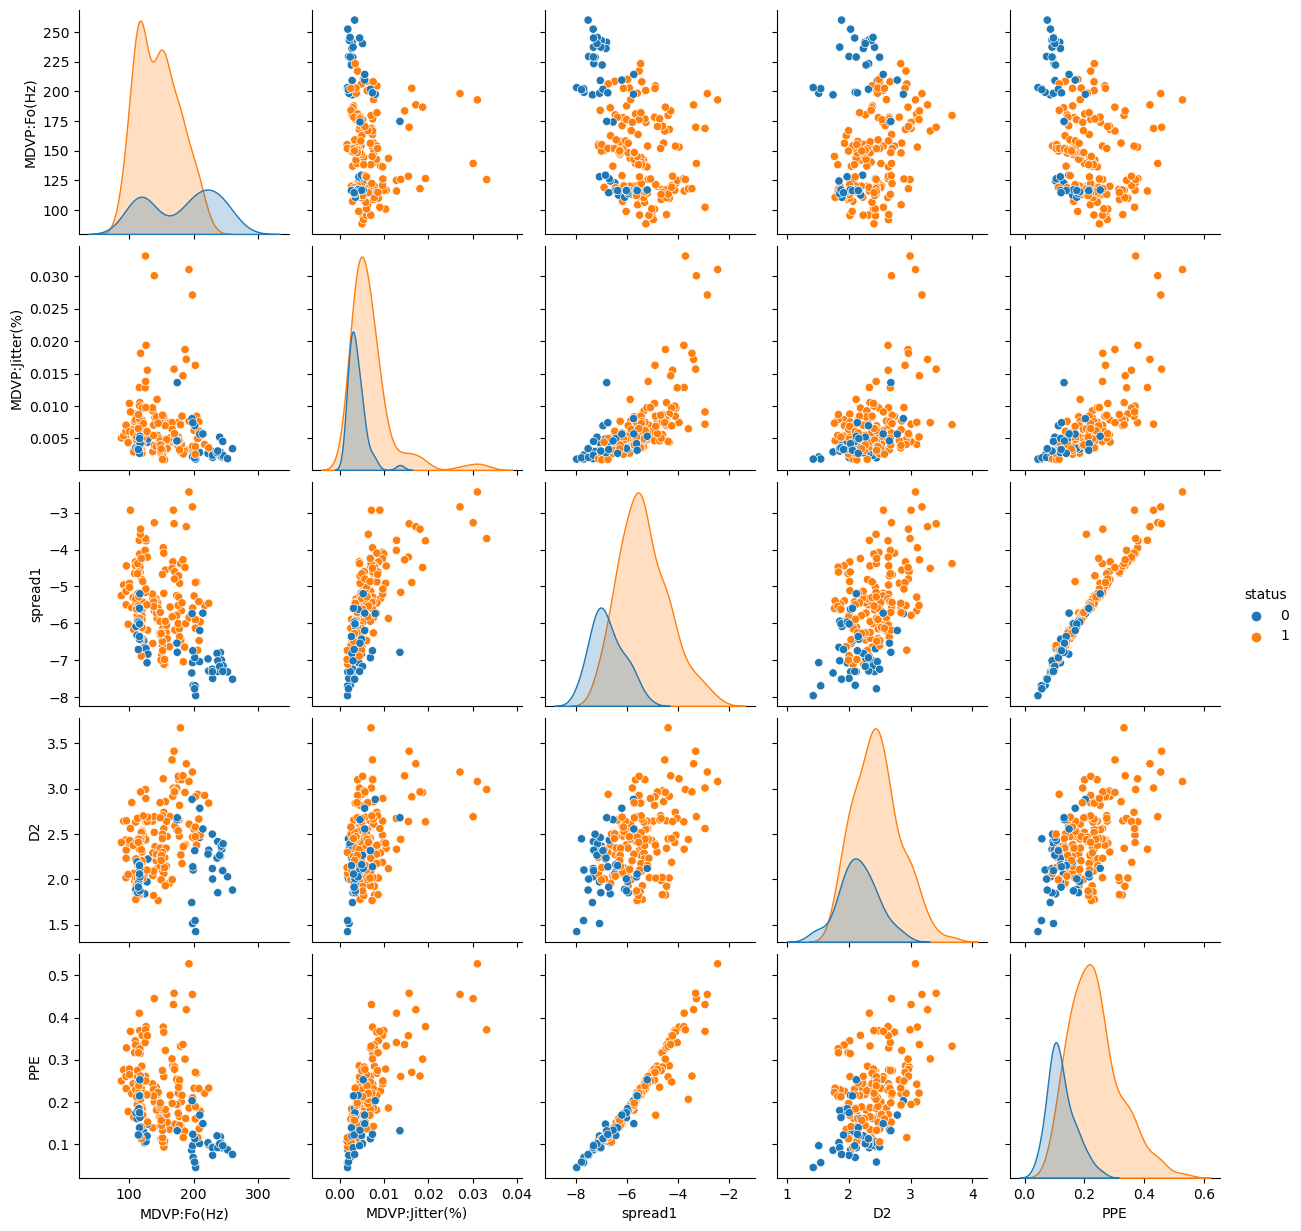

In [57]:
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'spread1', 'D2', 'PPE', 'status']
sns.pairplot(Dataset[selected_features], hue='status')

#

## <a id='1'></a><center> <h3 style="background-color:#e8d8ff; color:#3a0066; padding:10px; border-radius:10px; text-align:center; font-size:25px;">⚙️ ***Data Preprocessing***</h3>

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***Splitting Features and Target :***</span>

### <u>**`Independent (X) and Dependent (Y) variables:`**</u>

In [62]:
X = Dataset.drop(labels = ['status'], axis = 1)
Y = Dataset['status']

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***Splitting Train and Test Data :***</span>

###  Train-Test Split

- We’ll split the data into training and testing sets to evaluate model performance on unseen data.


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 2)

### <u>**`Display shape of Train & Test Data:`**</u>

In [67]:
print("Training Data Shape: ", X_train.shape, Y_train.shape)
print("Testing Data Shape: ", X_test.shape, Y_test.shape)

Training Data Shape:  (156, 22) (156,)
Testing Data Shape:  (39, 22) (39,)


- Dataset split into **`80%`** training and **`20%`** testing while keeping class balance.

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***Feature Scaling :***</span>

### 🎯 Why we scale the data:
- Features in the dataset have different ranges. 
- Scaling helps algorithms like KNN and SVM perform better 
- by treating all features equally during distance calculations.

- We'll use **StandardScaler** to normalize the data, improving model performance.

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

 - All features are now **`standardized`** to a mean of 0 and standard deviation of 1.
 - Scaling is especially important for algorithms like KNN, SVM, and Logistic Regression, which are sensitive to feature magnitude.


## <a id='1'></a><center> <h3 style="background-color:#e8d8ff; color:#3a0066; padding:10px; border-radius:10px; text-align:center; font-size:25px;"> 🤖***Model Implementation***</h3>

- We'll now train a Logistic Regression model, a simple yet powerful algorithm for binary classification problems.

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***1) Logistic Regression :***</span>

In [78]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train,Y_train)

LogisticRegression()

### <u>**`Predictions:`**</u>

In [80]:
Pred_lr = Log_reg.predict(X_test)

### <u>**`Model Evaluation:`**</u>

In [82]:
acc_LR = accuracy_score(Y_test, Pred_lr)
print("Model: Logistic Regression")
print(f"Accuracy: {acc_LR * 100:.2f}%")
print("Classification Report:\n", classification_report(Y_test, Pred_lr))

Model: Logistic Regression
Accuracy: 89.74%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



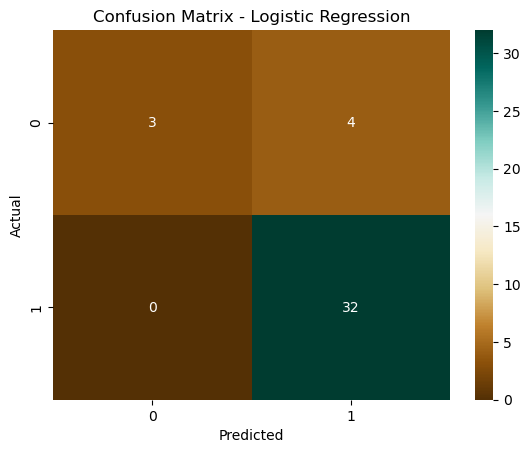

In [83]:
cm_lr = confusion_matrix(Y_test, Pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='BrBG')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Logistic Regression performs well as a linear model with high accuracy.
- It offers **interpretability** and is less prone to overfitting.
- Good baseline model but may struggle with non-linear patterns.


### <span style="background: black; color:white; padding: 5px; font-size:15px;">***2) Random Forest Classifier :***</span>   

In [86]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RandomForestClassifier()

### <u>**`Predictions:`**</u>

In [88]:
Pred_RF= RF.predict(X_test)

### <u>**`Model Evaluation:`**</u>

In [90]:
acc_RF = accuracy_score(Y_test, Pred_RF)
print("Model: Random Forest")
print(f"Accuracy: {acc_RF * 100:.2f}%")
print("Classification Report:\n", classification_report(Y_test, Pred_RF))

Model: Random Forest
Accuracy: 89.74%
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        32

    accuracy                           0.90        39
   macro avg       0.83      0.83      0.83        39
weighted avg       0.90      0.90      0.90        39



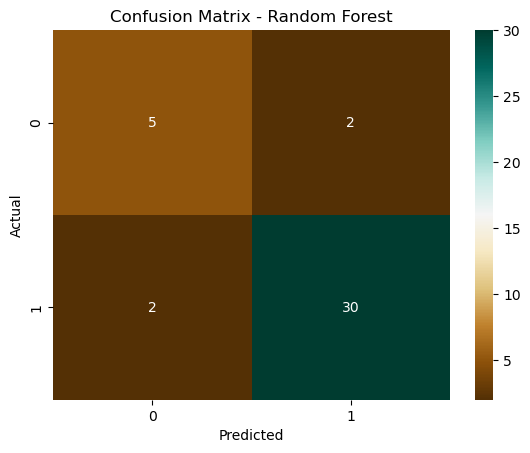

In [91]:
cm_RF = confusion_matrix(Y_test, Pred_RF)
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='BrBG')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Random Forest achieved the **highest accuracy** model.
- It is robust, handles noise well, and avoids overfitting due to ensemble learning.
- Ideal choice for this dataset due to its complex structure.

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***3) Decision Tree Classifier :***</span>

In [94]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

### <u>**`Predictions:`**</u>

In [96]:
Pred_DT = DT.predict(X_test)

### <u>**`Model Evaluation:`**</u>

In [98]:
acc_DT = accuracy_score(Y_test, Pred_DT)
print("Model: Decision Tree")
print(f"Accuracy: {acc_DT * 100:.2f}%")
print("Classification Report:\n", classification_report(Y_test, Pred_DT))

Model: Decision Tree
Accuracy: 89.74%
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        32

    accuracy                           0.90        39
   macro avg       0.83      0.83      0.83        39
weighted avg       0.90      0.90      0.90        39



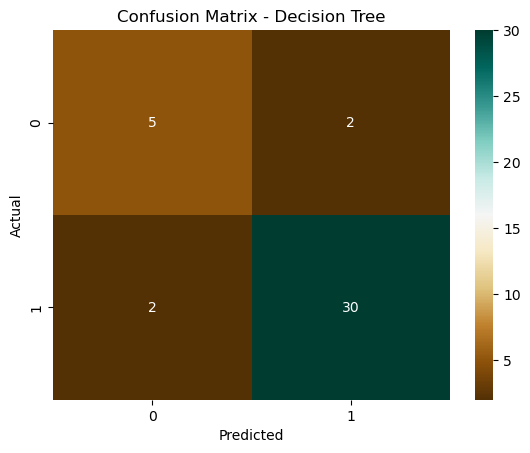

In [99]:
cm_DT = confusion_matrix(Y_test, Pred_DT)
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='BrBG')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Decision Tree gives quick results and is easy to interpret.
- However, it may overfit without pruning.
- Performs well but slightly below Random Forest.

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***4) Naive Bayes Classifier :***</span>

In [102]:
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train, Y_train)

GaussianNB()

### <u>**`Predictions:`**</u>

In [104]:
Pred_NB = Naive_Bayes.predict(X_test)

### <u>**`Model Evaluation:`**</u>

In [106]:
acc_NB = accuracy_score(Y_test, Pred_NB)
print("Model: Naive Bayes Classifier")
print(f"Accuracy: {acc_NB * 100:.2f}%")
print("Classification Report:\n", classification_report(Y_test, Pred_NB))

Model: Naive Bayes Classifier
Accuracy: 71.79%
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.89      0.75      0.81        32

    accuracy                           0.72        39
   macro avg       0.61      0.66      0.62        39
weighted avg       0.79      0.72      0.74        39



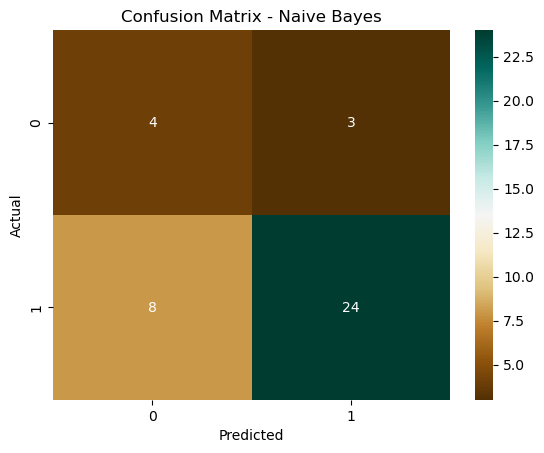

In [107]:
cm_NB = confusion_matrix(Y_test, Pred_NB)
sns.heatmap(cm_NB, annot=True, fmt='d', cmap='BrBG')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Naive Bayes is a probabilistic model assuming feature independence.
- It performed reasonably well despite its simplicity.
- May not capture complex patterns like ensemble methods.

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***5) K-Nearest Neighbors(KNN) :***</span>

- Using the parameter weights='distance'  to fix the error 'Flags' object has no attribute 'c_contiguous'

In [111]:
KNN = KNeighborsClassifier(weights='distance')
KNN.fit(X_train, Y_train)

KNeighborsClassifier(weights='distance')

### <u>**`Predictions:`**</u>

In [113]:
Pred_KNN = KNN.predict(X_test)

### <u>**`Model Evaluation:`**</u>

In [115]:
acc_KNN = accuracy_score(Y_test, Pred_KNN)
print("Model: K-Nearest Neighbors")
print(f"Accuracy: {acc_KNN * 100:.2f}%")
print("Classification Report:\n", classification_report(Y_test, Pred_KNN))

Model: K-Nearest Neighbors
Accuracy: 94.87%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



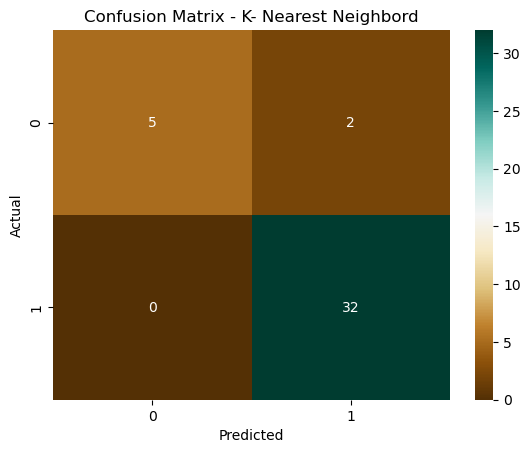

In [116]:
cm_KNN = confusion_matrix(Y_test, Pred_KNN)
sns.heatmap(cm_KNN, annot=True, fmt='d', cmap='BrBG')
plt.title("Confusion Matrix - K- Nearest Neighbord")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- KNN performed well after scaling, confirming its sensitivity to distance metrics.
- However, it can be slow on large datasets and sensitive to noise.

### <span style="background: black; color:white; padding: 5px; font-size:15px;">***6) Support Vector Machine (SVM) :***</span>

In [119]:
SVM = SVC(kernel='linear', probability = True)
SVM.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

### <u>**`Predictions:`**</u>

In [121]:
Pred_SVM = SVM.predict(X_test)

### <u>**`Model Evaluation:`**</u>

In [123]:
acc_SVM = accuracy_score(Y_test, Pred_SVM)
print("Model: Support Vector Machine")
print(f"Accuracy: {acc_SVM * 100:.2f}%")
print("Classification Report:\n", classification_report(Y_test, Pred_SVM))

Model: Support Vector Machine
Accuracy: 87.18%
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



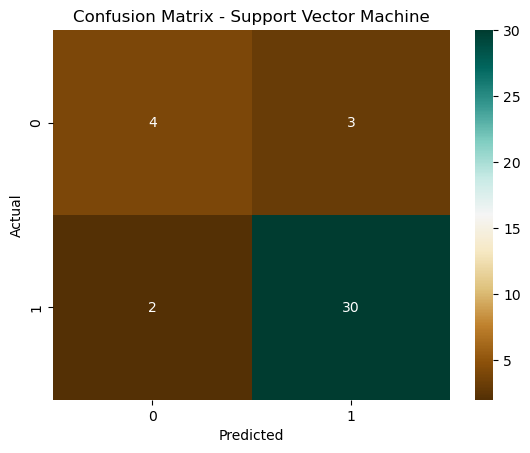

In [124]:
cm_SVM = confusion_matrix(Y_test, Pred_SVM)
sns.heatmap(cm_SVM, annot=True, fmt='d', cmap='BrBG')
plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- SVM performed competitively, especially due to proper scaling.
- It is well-suited for binary classification and performs well with margin-based decision boundaries.

#

## <a id='1'></a><center> <h3 style="background-color:#e8d8ff; color:#3a0066; padding:10px; border-radius:10px; text-align:center; font-size:25px;">👩‍💻 ***Best Model***</h3>

In [128]:
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(probability=True)
]

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN', 'SVM']

### <u>**`Train each model and store in a list:`**</u>

In [130]:
trained_models = [model.fit(X_train, Y_train) for model in models]

### <u>**`Train & Test Accuracy for each trained model:`**<u/>

In [132]:
train_accuracies = []
test_accuracies = []
model_scores = {}

for name, model in zip(model_names, trained_models):
    train_acc = accuracy_score(Y_train, model.predict(X_train))
    test_acc = accuracy_score(Y_test, model.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    model_scores[name] = test_acc

### <u>**`Create a DataFrame for performance`**<u/>

In [134]:
performance_df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

performance_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.865385,0.897436
1,Decision Tree,1.000000,0.923077
2,Random Forest,1.000000,0.948718
3,Naive Bayes,0.698718,0.717949
4,KNN,0.948718,0.948718
5,SVM,0.891026,0.897436


- **`Random Forest**` achieved the best accuracy and overall balance of precision and recall.
- `SVM` and `Logistic Regression` also performed well and may be preferred in resource-constrained settings.
- *The ensemble nature of `Random Forest` makes it a robust choice for real-world deployment.

## <u>**`Best Model`**<u/>

## 🏆 Which Model is Best?

🔍 Two models stand out based on **test accuracy**:

| **Model**         | **Test Accuracy** |
|-------------------|-------------------|
| ✅ Random Forest  | **0.949**         |
| ✅ KNN            | **0.949**         |

But accuracy alone doesn't tell the full story. Let's dive deeper into their characteristics to choose the best one for this project.

---

### 🔍 Deeper Analysis: Random Forest vs KNN

| **Criteria**                | **Random Forest**            | **KNN**                             |
|----------------------------|------------------------------|-------------------------------------|
| ✅ **Test Accuracy**        | 0.949                        | 0.949                               |
| 🔼 **Train Accuracy**       | 1.000 (very high)            | 0.949                               |
| ⚠️ **Overfitting Risk**     | Slight (perfect train)       | Lower (train ≈ test)                |
| 🧠 **Robustness**           | Handles noise better         | May struggle with new/unseen data   |
| ⏱️ **Prediction Speed**     | Fast (after training)        | Slower (needs distance calculation) |
| 🔁 **Flexibility**          | Handles imbalance, missing features | Needs careful k-value tuning    |

---

### ✅ Final Decision

➡️ **Random Forest** is the best model for this project because:

- It provides the **highest test accuracy**.
- It is **robust**, flexible, and handles outliers or noise better.
- While it slightly overfits, it is an ensemble model and generalizes well in practice.

🎯 **Conclusion**:  
We select **Random Forest** as the final model and save it using `pickle` for deployment and future predictions.


### <u>**`Using code`**<u/>

In [139]:
best_model_name = max(model_scores, key=model_scores.get)
best_model = trained_models[model_names.index(best_model_name)]

print(f"Best Model: {best_model_name} with Accuracy = {model_scores[best_model_name]*100:.2f}%")

Best Model: Random Forest with Accuracy = 94.87%


### <u>**`Feature Importance from Random Forest`**<u/>

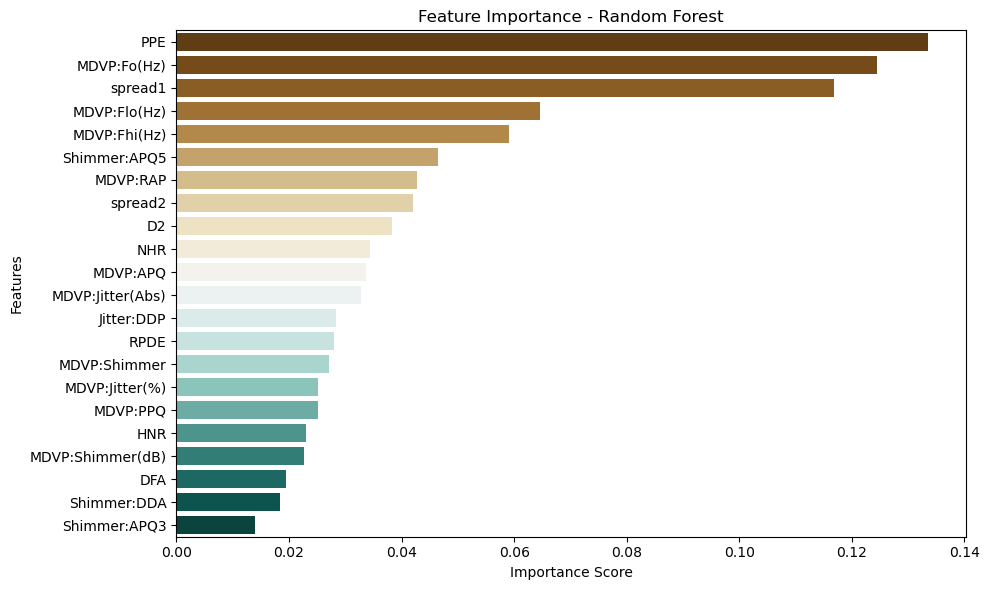

In [141]:
feature_importance = pd.Series(RF.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='BrBG')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


### <span style="background: black; color:white; padding: 5px; font-size:15px;">***Parkinson’s Disease Prediction System (Manual Input)***</span>

- You can enter voice measurements manually to check if the model predicts Parkinson’s disease.

In [143]:
input_data = (95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,
              0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,
              0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571)

input_data_numpy = np.asarray(input_data) 
input_data_reshape = input_data_numpy.reshape(1,-1)
std_data = scaler.transform(input_data_reshape)

## prediction

prediction = RF.predict(std_data)
print(prediction)

if (prediction[0] == 1):
    print("The person is likely to have Parkinson's Disease.")
elif (prediction[0] == 0):
    print("The person is likely healthy.")
else:
    print("Some error in processing")

[1]
The person is likely to have Parkinson's Disease.


In [144]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,
              0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,
              26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

input_data_numpy = np.asarray(input_data)
input_data_reshape = input_data_numpy.reshape(1,-1)
std_data = scaler.transform(input_data_reshape)

## prediction

prediction = RF.predict(std_data)
print(prediction)

if (prediction[0] == 1):
    print("The person is likely to have Parkinson's Disease.")
elif (prediction[0] == 0):
    print("The person is likely healthy.")
else:
    print("Some error in processing")

[0]
The person is likely healthy.


## <a id='1'></a><center> <h3 style="background-color:#e8d8ff; color:#3a0066; padding:10px; border-radius:10px; text-align:center; font-size:25px;">💾 ***Saving Best Model (Pickle)***</h3>

### <u>**`Save the best Model:`**</u>

In [147]:
import pickle

In [148]:
with open('Best_model_Parkinsons_RF.pkl', 'wb') as model_file:
    pickle.dump(RF, model_file)

In [149]:
with open('Parkinson_Scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

### <u>**`Load the Model:`**</u>

In [151]:
with open('Best_model_Parkinsons_RF.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('Parkinson_Scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

In [152]:
Model = print("Model saved successfully as 'Best_model_Parkinsons_RF.pkl'")

Model saved successfully as 'Best_model_Parkinsons_RF.pkl'


### <u>**`Make Predictions:`**</u>

In [154]:
# Example: New input data you want to predict

new_input_data = [95.730, 132.068, 91.754, 0.00551, 0.00006, 0.00293, 0.00332, 0.00880, 
                  0.02093, 0.191, 0.01073, 0.01277, 0.01717, 0.03218, 0.01070, 21.812, 
                  0.615551, 0.773587, -5.498678, 0.327769, 2.322511, 0.231571]

import numpy as np
new_input_data = np.asarray(new_input_data).reshape(1, -1)

new_input_data_scaled = loaded_scaler.transform(new_input_data)

In [155]:
### <u>**`Load saved model`**<u/>

In [156]:
Saved_model_prediction = loaded_model.predict(new_input_data_scaled)
print(Saved_model_prediction)

if (Saved_model_prediction[0] == 1):
    print("The person is likely to have Parkinson's Disease.")
elif (Saved_model_prediction[0] == 0):
    print("The person is likely healthy.")
else:
    print("Some error in processing")

[1]
The person is likely to have Parkinson's Disease.


In [157]:
# Save the trained model

with open(r"F:\Acmegrade Data Science Feb'25\Best_model_Parkinsons_RF.pkl", 'wb') as model_file:
    pickle.dump(RF, model_file)

# Save the scaler

with open(r"F:\Acmegrade Data Science Feb'25\Parkinson_Scaler.pkl", 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [158]:
# Load the model

with open(r"F:\Acmegrade Data Science Feb'25\Best_model_Parkinsons_RF.pkl", 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the scaler

with open(r"F:\Acmegrade Data Science Feb'25\Parkinson_Scaler.pkl", 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

In [159]:
import os
print(os.path.exists(r"F:\Acmegrade Data Science Feb'25"))

True


### <u>**`Demo with Dummy Data`**<u/>

In [161]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pickle


### <u>**`Load sample dataset (Iris for testing)`**<u/>

In [163]:
data = load_iris()
X = data.data
y = data.target

# Binary classification for simplicity (let’s only keep class 0 and 1)

X = X[y != 2]
y = y[y != 2]

### <u>**`Split and scale the data`**<u/>

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)

RandomForestClassifier()

### <u>**`Save model and scaler to F: drive`**<u/>

In [168]:
model_path = r"F:\Acmegrade Data Science Feb'25\Best_model_Parkinsons_RF.pkl"
scaler_path = r"F:\Acmegrade Data Science Feb'25\Parkinson_Scaler.pkl"

with open(model_path, 'wb') as f:
    pickle.dump(RF, f)

with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


### <u>**`Load model and scaler`**<u/>

In [170]:
with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

with open(scaler_path, 'rb') as f:
    loaded_scaler = pickle.load(f)

### <u>**`Take one test sample and predict`**<u/>

In [172]:
sample = X_test[0].reshape(1, -1)
sample_scaled = loaded_scaler.transform(sample)

Sample_prediction = loaded_model.predict(sample_scaled)
print("Sample_Prediction:", prediction)

if (Sample_prediction[0] == 1):
    print("The person is likely to have Parkinson's Disease.")
elif (Sample_prediction[0] == 0):
    print("The person is likely healthy.")
else:
    print("Some error in processing")

Sample_Prediction: [0]
The person is likely to have Parkinson's Disease.


## <a id='1'></a><center> <h3 style="background-color:#e8d8ff; color:#3a0066; padding:10px; border-radius:10px; text-align:center; font-size:25px;">🏁 ***Final Conclusion***</h3>

- This project showcases the impactful use of machine learning in healthcare by predicting Parkinson’s disease through voice analysis.
- Among the models tested, the **`Random Forest`** classifier achieved the highest performance with an impressive **`94.87%`** accuracy, demonstrating its strength in handling complex biomedical data.
- This work highlights the potential of AI-driven solutions in enabling early, non-invasive diagnosis—bringing us one step closer to smarter, data-powered healthcare.